<a href="https://colab.research.google.com/github/hsabaghpour/Searching-Indexing-Algorithm/blob/main/Building_Complex_Models_Using_the_Functional_API.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In the Functional API, we can create more complex neural networks. One example is the Wide & Deep architecture. Unlike a regular MLP, it allows the model to learn both deep and simple patterns simultaneously. It achieves this by connecting the inputs directly to the output layer alongside the deep layers, giving it the ability to capture different types of patterns in the data. This is in contrast to a regular MLP, which forces all data to go through all layers, potentially distorting simple patterns in the process.




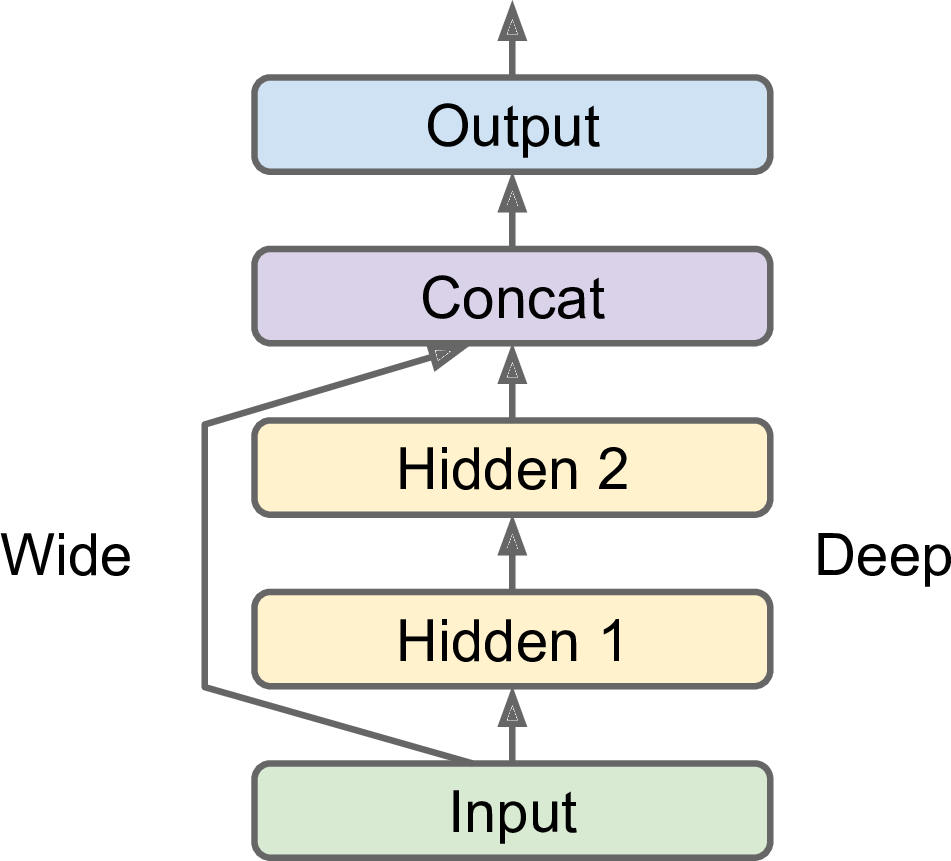

In [5]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)

X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

#tf.random.set_seed(42)


normalization_layer = tf.keras.layers.Normalization()
hidden_layer1 = tf.keras.layers.Dense(30, activation="relu")
hidden_layer2 = tf.keras.layers.Dense(30, activation="relu")
concat_layer = tf.keras.layers.Concatenate()
output_layer = tf.keras.layers.Dense(1)

input_ = tf.keras.layers.Input(shape=X_train.shape[1:])
normalized = normalization_layer(input_)
hidden1 = hidden_layer1(normalized)
hidden2 = hidden_layer2(hidden1)
concat = concat_layer([normalized, hidden2])
output = output_layer(concat)

model = tf.keras.Model(inputs=[input_], outputs=[output])

optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])
normalization_layer.adapt(X_train)
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))
mse_test, rmse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)



Epoch 1/20
363/363 [==============================] - 2s 3ms/step - loss: 1.3662 - root_mean_squared_error: 1.1689 - val_loss: 0.7555 - val_root_mean_squared_error: 0.8692
Epoch 2/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5246 - root_mean_squared_error: 0.7243 - val_loss: 0.5038 - val_root_mean_squared_error: 0.7098
Epoch 3/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4350 - root_mean_squared_error: 0.6596 - val_loss: 0.4644 - val_root_mean_squared_error: 0.6815
Epoch 4/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4031 - root_mean_squared_error: 0.6349 - val_loss: 0.3951 - val_root_mean_squared_error: 0.6286
Epoch 5/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3857 - root_mean_squared_error: 0.6211 - val_loss: 0.3544 - val_root_mean_squared_error: 0.5953
Epoch 6/20
363/363 [==============================] - 2s 5ms/step - loss: 0.3723 - root_mean_squared_error: 0.6102 - val_loss: 0.3440 - val_

This code does the following:

Loads the California housing dataset and prepares the data for training and testing.

Creates a neural network model with normalization and multiple hidden layers for regression.

Trains the model on the training data for 20 epochs, monitoring performance on validation data.

Evaluates the model's performance on the test data, calculating both mean squared error (MSE) and root mean squared error (RMSE).

Makes predictions with the trained model on new data.

In essence, it builds and trains a neural network for predicting house prices in California, providing evaluation metrics and the ability to make predictions on new data.






But what if you want to send a subset of the features through the wide path and a different subset (possibly overlapping) through the deep path, as illustrated in Figure below? In this case, one solution is to use multiple inputs. For example, suppose we want to send five features through the wide path (features 0 to 4), and six features through the deep path (features 2 to 7). We can do this as follows:

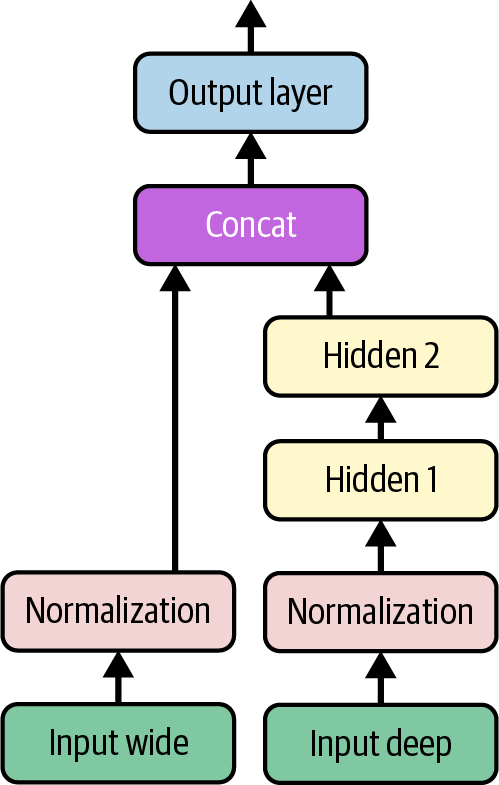

In [7]:
input_wide = tf.keras.layers.Input(shape=[5])  # features 0 to 4
input_deep = tf.keras.layers.Input(shape=[6])  # features 2 to 7
norm_layer_wide = tf.keras.layers.Normalization()
norm_layer_deep = tf.keras.layers.Normalization()
norm_wide = norm_layer_wide(input_wide)
norm_deep = norm_layer_deep(input_deep)
hidden1 = tf.keras.layers.Dense(30, activation="relu")(norm_deep)
hidden2 = tf.keras.layers.Dense(30, activation="relu")(hidden1)
concat = tf.keras.layers.concatenate([norm_wide, hidden2])
output = tf.keras.layers.Dense(1)(concat)
model = tf.keras.Model(inputs=[input_wide, input_deep], outputs=[output])

optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])

X_train_wide, X_train_deep = X_train[:, :5], X_train[:, 2:]
X_valid_wide, X_valid_deep = X_valid[:, :5], X_valid[:, 2:]
X_test_wide, X_test_deep = X_test[:, :5], X_test[:, 2:]
X_new_wide, X_new_deep = X_test_wide[:3], X_test_deep[:3]

norm_layer_wide.adapt(X_train_wide)
norm_layer_deep.adapt(X_train_deep)
history = model.fit((X_train_wide, X_train_deep), y_train, epochs=20,
                    validation_data=((X_valid_wide, X_valid_deep), y_valid))
mse_test = model.evaluate((X_test_wide, X_test_deep), y_test)
y_pred = model.predict((X_new_wide, X_new_deep))



Epoch 1/20
363/363 [==============================] - 4s 6ms/step - loss: 1.2523 - root_mean_squared_error: 1.1191 - val_loss: 0.5267 - val_root_mean_squared_error: 0.7258
Epoch 2/20
363/363 [==============================] - 2s 6ms/step - loss: 0.4856 - root_mean_squared_error: 0.6969 - val_loss: 0.4171 - val_root_mean_squared_error: 0.6458
Epoch 3/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4234 - root_mean_squared_error: 0.6507 - val_loss: 0.3700 - val_root_mean_squared_error: 0.6083
Epoch 4/20
363/363 [==============================] - 2s 4ms/step - loss: 0.4016 - root_mean_squared_error: 0.6337 - val_loss: 0.3711 - val_root_mean_squared_error: 0.6092
Epoch 5/20
363/363 [==============================] - 1s 4ms/step - loss: 0.3879 - root_mean_squared_error: 0.6228 - val_loss: 0.3449 - val_root_mean_squared_error: 0.5873
Epoch 6/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3726 - root_mean_squared_error: 0.6104 - val_loss: 0.3329 - val_

In another scenario, dropout can serve as a regularization technique to prevent overfitting and enhance the model's ability to work well on new, unseen data. For instance, you might include an extra output in a neural network (as shown in Figure below) to encourage a part of the network to learn independently, without depending too much on the rest of the network.

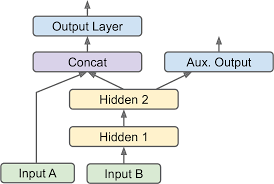




In [11]:
# ... same as above , upto the output layer

output = tf.keras.layers.Dense(1)(concat)
aux_output = tf.keras.layers.Dense(1)(hidden2)
model = tf.keras.Model(inputs=[input_wide, input_deep],
                       outputs=[output, aux_output])


optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss=("mse", "mse"), loss_weights=(0.9, 0.1), optimizer=optimizer,
              metrics=["RootMeanSquaredError"])

norm_layer_wide.adapt(X_train_wide)
norm_layer_deep.adapt(X_train_deep)
history = model.fit(
    (X_train_wide, X_train_deep), (y_train, y_train), epochs=20,
    validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid))
)




Epoch 1/20
363/363 [==============================] - 3s 4ms/step - loss: 0.9562 - dense_27_loss: 0.9493 - dense_28_loss: 1.0185 - dense_27_root_mean_squared_error: 0.9743 - dense_28_root_mean_squared_error: 1.0092 - val_loss: 0.4648 - val_dense_27_loss: 0.4610 - val_dense_28_loss: 0.4991 - val_dense_27_root_mean_squared_error: 0.6790 - val_dense_28_root_mean_squared_error: 0.7065
Epoch 2/20
363/363 [==============================] - 1s 4ms/step - loss: 0.4333 - dense_27_loss: 0.4260 - dense_28_loss: 0.4991 - dense_27_root_mean_squared_error: 0.6527 - dense_28_root_mean_squared_error: 0.7065 - val_loss: 0.3694 - val_dense_27_loss: 0.3607 - val_dense_28_loss: 0.4478 - val_dense_27_root_mean_squared_error: 0.6006 - val_dense_28_root_mean_squared_error: 0.6692
Epoch 3/20
363/363 [==============================] - 2s 5ms/step - loss: 0.3788 - dense_27_loss: 0.3707 - dense_28_loss: 0.4517 - dense_27_root_mean_squared_error: 0.6088 - dense_28_root_mean_squared_error: 0.6721 - val_loss: 0.340

In [12]:
eval_results = model.evaluate((X_test_wide, X_test_deep), (y_test, y_test))
weighted_sum_of_losses, main_loss, aux_loss, main_rmse, aux_rmse = eval_results

162/162 [==============================] - 0s 2ms/step - loss: 0.3422 - dense_27_loss: 0.3368 - dense_28_loss: 0.3910 - dense_27_root_mean_squared_error: 0.5803 - dense_28_root_mean_squared_error: 0.6253


In [13]:
y_pred_main, y_pred_aux = model.predict((X_new_wide, X_new_deep))



1/1 [==============================] - 0s 95ms/step


In [14]:
y_pred_tuple = model.predict((X_new_wide, X_new_deep))
y_pred = dict(zip(model.output_names, y_pred_tuple))


1/1 [==============================] - 0s 25ms/step
